# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.7/157.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 10.3 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=f86761dde5787e3e527552319e8c5a4755f3b7e954f58e17848bb3a465ff523f
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.5 MB/s eta 0:00:0000:0100:01
  Using cached certifi-2025.6.15-py3-none-any.whl (157 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 29.3 MB/s eta 0:00:00


In [11]:
!pip install --target=/workspace xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 1.4 MB/s eta 0:00:00a 0:00:01


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
I want to look at trends in bird populations in Santa Barbara, California, over time. I also want to explore whether or not there is a correlation between annual rainfall and the size of bird populations.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [1]:
import pandas as pd
import numpy as np
import requests
import os

#### Santa Barbara's Christmas Bird Count Data

Type: CSV File

Method: The data was gathered using the "Downloading files" method from the Audubon Society's Christmas Bird Count data website, https://netapp.audubon.org/CBCObservation/Historical/ResultsByCount.aspx#. The data includes all available data from the years 1900 to 2023 for Santa Barbara.

Dataset variables:

*   COM_NAME: common name of the bird followed by the scientific name (these two names are aplit into separate columns in the cleaning process)
*   CountYear: the year the bird count occurred (this column also contains the date of the count and other labels that will be removed in the cleaning process)
*   how_manyCW: how many birds were counted on the day of the count (if a species was seen during count week but not on count day, it will have the value "cw" according to this website: https://www.audubon.org/conservation/science/christmas-bird-count/christmas-bird-count-compiler-resources)
*   NumberByPartyHours: There is no official documentation that I could find on this, but it is likely the number of birds counted divided by the number of party hours for that year. The number of party hours is the sum of how many hours each party (group of birders working together) spent birding.
*   Flags: It is unclear what the values in this column denote. I couldn't find any documentation on it.

In [2]:
#The CSV file contains multiple tables with varying numbers of columns, so set header to none and names to a range with the max number of columns in a table
cbc_df = pd.read_csv('data/SB_CBC1900-2023Results.csv', header=None, names=range(9))
cbc_df.head()

,0,1,2,3,4,5,6,7,8
0,CircleName,Abbrev,LatLong,NaN,NaN,NaN,NaN,NaN,NaN
1,Santa Barbara,CASB,34.4512000000/-119.7627000000,NaN,NaN,NaN,NaN,NaN,NaN
2,CountYear3,LowTemp,HighTemp,AMCloud,PMClouds,AMRain,PMRain,AMSnow,PMSnow
3,124,48.0 Fahrenheit,65.0 Fahrenheit,Cloudy,Cloudy,Light,NaN,NaN,NaN
4,123,54.0 Fahrenheit,60.0 Fahrenheit,Cloudy,Cloudy,Heavy\r\nLight,Heavy\r\nLight,NaN,NaN


In [3]:
#find the row containing the headers for the table with the bird counts
header_row = cbc_df[cbc_df[0] == 'COM_NAME']
header_row

,0,1,2,3,4,5,6,7,8
244,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags,NaN,NaN,NaN,NaN


In [4]:
#find the row containing the header for the next table after the bird count table
next_header_row = cbc_df[cbc_df[0] == 'CountYear1']
next_header_row

,0,1,2,3,4,5,6,7,8
42742,CountYear1,FirstName,LastName,Email,IsPrimary,NaN,NaN,NaN,NaN


In [5]:
#get the subset of the data that contains the bird counts and the header
bird_counts = cbc_df.iloc[header_row.index[0]:next_header_row.index[0]]
new_header = bird_counts.iloc[0]
bird_counts = bird_counts[1:]
bird_counts.columns = new_header
bird_counts.reset_index(inplace=True, drop=True)
bird_counts = bird_counts.rename_axis(None, axis=1) #remove name of index column
bird_counts.drop(columns=np.nan, inplace=True) #drop the extra columns
bird_counts.head()

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
0,Acorn Woodpecker\r\n[Melanerpes formicivorus],1902 [3]\r\nCount Date: 12/26/1902\r\n# Partic...,3,0.0000,NaN
1,Acorn Woodpecker\r\n[Melanerpes formicivorus],1910 [11]\r\nCount Date: 12/24/1910\r\n# Parti...,1,0.0000,NaN
2,Acorn Woodpecker\r\n[Melanerpes formicivorus],1911 [12]\r\nCount Date: 12/23/1911\r\n# Parti...,30,0.0000,NaN
3,Acorn Woodpecker\r\n[Melanerpes formicivorus],1912 [13]\r\nCount Date: 12/26/1912\r\n# Parti...,25,0.0000,NaN
4,Acorn Woodpecker\r\n[Melanerpes formicivorus],1913 [14]\r\nCount Date: 12/27/1913\r\n# Parti...,20,0.0000,NaN


In [6]:
bird_counts.tail()

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
42492,Zone-tailed Hawk\r\n[Buteo albonotatus],2019 [120]\r\nCount Date: 1/4/2020\r\n# Partic...,cw,0.0000,NaN
42493,Zone-tailed Hawk\r\n[Buteo albonotatus],2020 [121]\r\nCount Date: 1/2/2021\r\n# Partic...,NaN,NaN,NaN
42494,Zone-tailed Hawk\r\n[Buteo albonotatus],2021 [122]\r\nCount Date: 1/1/2022\r\n# Partic...,NaN,NaN,NaN
42495,Zone-tailed Hawk\r\n[Buteo albonotatus],2022 [123]\r\nCount Date: 12/31/2022\r\n# Part...,NaN,NaN,NaN
42496,Zone-tailed Hawk\r\n[Buteo albonotatus],2023 [124]\r\nCount Date: 12/30/2023\r\n# Part...,NaN,NaN,NaN


#### Santa Barbara's Daily Precipitation Data

Type: XLS File

Method: The data was gathered by programmatically downloading the file from the County of Santa Barbara's website (https://files.countyofsb.org/pwd/hydrology/historic%20data/rainfall/XLS%20Dailys/234dailys.xls).

Dataset variables:

*   station id: the id of the station collecting the data
*   water year: the water year the date of the data point falls in (a water year begins on October 1 of a given year and ends on September 30 of the following calendar year)
*   year: the year the data point was collected
*   month: the month the data point was collected
*   day: the day of the month that the data point was collected
*   daily rain: the amount of rain in inches as of 8 am for the previous 24 hours
*   code: PR for preliminar data or E for estimated from nearby guage. The meaning of the numbers and other codes in this column are unclear.

In [7]:
response = requests.get('https://files.countyofsb.org/pwd/hydrology/historic%20data/rainfall/XLS%20Dailys/234dailys.xls')
response.raise_for_status()

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [8]:
file_path = os.path.join('data', 'Santa_Barbara_daily_precipitation_data.xls')
with open(file_path, mode = 'wb') as file:
    file.write(response.content)

In [9]:
rain_data = pd.read_excel(file_path, header=8, skiprows=1, parse_dates={'date':['year', 'month', 'day']})
rain_data.head()

,date,station id,water year,daily rain,code
0,1899-10-11,234,1900,0.12,E339
1,1899-10-12,234,1900,0.08,E339
2,1899-10-13,234,1900,1.30,E339
3,1899-10-14,234,1900,0.02,E339
4,1899-10-21,234,1900,0.46,E339


In [10]:
rain_data.tail()

,date,station id,water year,daily rain,code
4755,2025-04-26,234,2025,0.27,PR
4756,2025-04-27,234,2025,0.08,PR
4757,2025-05-05,234,2025,0.01,PR
4758,2025-06-03,234,2025,0.01,PR
4759,2025-06-16,234,2025,0.00,PR


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [11]:
bird_counts.head()

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
0,Acorn Woodpecker\r\n[Melanerpes formicivorus],1902 [3]\r\nCount Date: 12/26/1902\r\n# Partic...,3,0.0000,NaN
1,Acorn Woodpecker\r\n[Melanerpes formicivorus],1910 [11]\r\nCount Date: 12/24/1910\r\n# Parti...,1,0.0000,NaN
2,Acorn Woodpecker\r\n[Melanerpes formicivorus],1911 [12]\r\nCount Date: 12/23/1911\r\n# Parti...,30,0.0000,NaN
3,Acorn Woodpecker\r\n[Melanerpes formicivorus],1912 [13]\r\nCount Date: 12/26/1912\r\n# Parti...,25,0.0000,NaN
4,Acorn Woodpecker\r\n[Melanerpes formicivorus],1913 [14]\r\nCount Date: 12/27/1913\r\n# Parti...,20,0.0000,NaN


In [12]:
bird_counts['COM_NAME'].value_counts()

COM_NAME
Acorn Woodpecker\r\n[Melanerpes formicivorus]                  91
Red-breasted Nuthatch\r\n[Sitta canadensis]                    91
Ridgway's Rail (Light-footed)\r\n[Rallus obsoletus levipes]    91
Rhinoceros Auklet\r\n[Cerorhinca monocerata]                   91
Redhead\r\n[Aythya americana]                                  91
                                                               ..
Golden Eagle\r\n[Aquila chrysaetos]                            91
Glossy/White-faced Ibis\r\n[Plegadis falcinellus/chihi]        91
Glaucous-winged Gull\r\n[Larus glaucescens]                    91
Glaucous Gull\r\n[Larus hyperboreus]                           91
Zone-tailed Hawk\r\n[Buteo albonotatus]                        91
Name: count, Length: 467, dtype: int64

In [27]:
years_included = [int(y[0:4]) for y in bird_counts['CountYear'].unique()] 
all_years = range(1900,2024)
missing_years = set(all_years) - set(years_included)
missing_years

{1900,
 1901,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1916,
 1918,
 1922,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960}

In [28]:
len(missing_years)

33

Issue and justification: Data from 33 years is not available. This is first apparent when looking at the value counts for the species of birds, and confirmed by comparing the years in the data set to the years in the range from 1900 to 2023, which is the range of years the website said data was available for.  
It is also useful to note that since the value counts for each bird's name is 91, and 91 + 33 is 124, which is the number of years for which we wanted data (1900-2023), the common name of each bird is likely listed once for each year that data is available.

### Quality Issue 2:

In [14]:
bird_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42497 entries, 0 to 42496
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   COM_NAME            42497 non-null  object
 1   CountYear           42497 non-null  object
 2   how_manyCW          16141 non-null  object
 3   NumberByPartyHours  16141 non-null  object
 4   Flags               682 non-null    object
dtypes: object(5)
memory usage: 1.6+ MB


In [15]:
#check the rows with null values for how_manyCW to see if there are any notes or patterns to why they are null
bird_counts[bird_counts['how_manyCW'].isnull()]

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
91,African Collared-Dove\r\n[Streptopelia roseogr...,1902 [3]\r\nCount Date: 12/26/1902\r\n# Partic...,NaN,NaN,NaN
92,African Collared-Dove\r\n[Streptopelia roseogr...,1910 [11]\r\nCount Date: 12/24/1910\r\n# Parti...,NaN,NaN,NaN
93,African Collared-Dove\r\n[Streptopelia roseogr...,1911 [12]\r\nCount Date: 12/23/1911\r\n# Parti...,NaN,NaN,NaN
94,African Collared-Dove\r\n[Streptopelia roseogr...,1912 [13]\r\nCount Date: 12/26/1912\r\n# Parti...,NaN,NaN,NaN
95,African Collared-Dove\r\n[Streptopelia roseogr...,1913 [14]\r\nCount Date: 12/27/1913\r\n# Parti...,NaN,NaN,NaN
...,...,...,...,...,...
42491,Zone-tailed Hawk\r\n[Buteo albonotatus],2018 [119]\r\nCount Date: 1/5/2019\r\n# Partic...,NaN,NaN,NaN
42493,Zone-tailed Hawk\r\n[Buteo albonotatus],2020 [121]\r\nCount Date: 1/2/2021\r\n# Partic...,NaN,NaN,NaN
42494,Zone-tailed Hawk\r\n[Buteo albonotatus],2021 [122]\r\nCount Date: 1/1/2022\r\n# Partic...,NaN,NaN,NaN
42495,Zone-tailed Hawk\r\n[Buteo albonotatus],2022 [123]\r\nCount Date: 12/31/2022\r\n# Part...,NaN,NaN,NaN


In [16]:
bird_counts[bird_counts['how_manyCW'] == '0']

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags


In [17]:
bird_counts[bird_counts['how_manyCW'] == 'cw']

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
210,Allen's Hummingbird\r\n[Selasphorus sasin],1961 [62]\r\nCount Date: 12/30/1961\r\n# Parti...,cw,0.0000,NaN
321,American Avocet\r\n[Recurvirostra americana],1981 [82]\r\nCount Date: 1/2/1982\r\n# Partici...,cw,0.0000,NaN
334,American Avocet\r\n[Recurvirostra americana],1994 [95]\r\nCount Date: 12/31/1994\r\n# Parti...,cw,0.0000,NaN
356,American Avocet\r\n[Recurvirostra americana],2016 [117]\r\nCount Date: 12/31/2016\r\n# Part...,cw,0.0000,NaN
419,American Bittern\r\n[Botaurus lentiginosus],1988 [89]\r\nCount Date: 12/31/1988\r\n# Parti...,cw,0.0000,NaN
...,...,...,...,...,...
41676,Yellow-bellied/Red-naped Sapsucker\r\n[Sphyrap...,2022 [123]\r\nCount Date: 12/31/2022\r\n# Part...,cw,0.0000,NaN
42158,Yellow-rumped Warbler (Audubon's)\r\n[Setophag...,1937 [38]\r\nCount Date: 12/20/1937\r\n# Parti...,cw,0.0000,NaN
42466,Zone-tailed Hawk\r\n[Buteo albonotatus],1993 [94]\r\nCount Date: 1/1/1994\r\n# Partici...,cw,0.0000,NaN
42473,Zone-tailed Hawk\r\n[Buteo albonotatus],2000 [101]\r\nCount Date: 12/30/2000\r\n# Part...,cw,0.0000,"US,"


In [18]:
bird_counts[bird_counts['NumberByPartyHours'].isnull() == False]

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
0,Acorn Woodpecker\r\n[Melanerpes formicivorus],1902 [3]\r\nCount Date: 12/26/1902\r\n# Partic...,3,0.0000,NaN
1,Acorn Woodpecker\r\n[Melanerpes formicivorus],1910 [11]\r\nCount Date: 12/24/1910\r\n# Parti...,1,0.0000,NaN
2,Acorn Woodpecker\r\n[Melanerpes formicivorus],1911 [12]\r\nCount Date: 12/23/1911\r\n# Parti...,30,0.0000,NaN
3,Acorn Woodpecker\r\n[Melanerpes formicivorus],1912 [13]\r\nCount Date: 12/26/1912\r\n# Parti...,25,0.0000,NaN
4,Acorn Woodpecker\r\n[Melanerpes formicivorus],1913 [14]\r\nCount Date: 12/27/1913\r\n# Parti...,20,0.0000,NaN
...,...,...,...,...,...
42476,Zone-tailed Hawk\r\n[Buteo albonotatus],2003 [104]\r\nCount Date: 1/3/2004\r\n# Partic...,1,0.0030,"US,"
42477,Zone-tailed Hawk\r\n[Buteo albonotatus],2004 [105]\r\nCount Date: 1/2/2005\r\n# Partic...,1,0.0036,"US,"
42478,Zone-tailed Hawk\r\n[Buteo albonotatus],2005 [106]\r\nCount Date: 12/31/2005\r\n# Part...,1,0.0040,"US,"
42479,Zone-tailed Hawk\r\n[Buteo albonotatus],2006 [107]\r\nCount Date: 12/30/2006\r\n# Part...,1,0.0030,"US,"


Issue and justification: When working with numerical data, we should always look at the data types of the columns and check for null values and any other values that may indicate null or missing data. There are 26,356 rows in which the "how_manyCW" column has the value NaN. There are not any rows in which the value is 0. This suggests that when a specific type of bird was not seen in a given year, it was entered as NaN rather than as 0.  
Also, there are 292 entries in which a bird was seen during "count week" but not see on "count day" and is therefore labeled as "cw" (see https://www.audubon.org/conservation/science/christmas-bird-count/christmas-bird-count-compiler-resources for the documentation on "cw").

### Quality Issue 3:

In [19]:
bird_counts[bird_counts['NumberByPartyHours'].isnull()]

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
91,African Collared-Dove\r\n[Streptopelia roseogr...,1902 [3]\r\nCount Date: 12/26/1902\r\n# Partic...,NaN,NaN,NaN
92,African Collared-Dove\r\n[Streptopelia roseogr...,1910 [11]\r\nCount Date: 12/24/1910\r\n# Parti...,NaN,NaN,NaN
93,African Collared-Dove\r\n[Streptopelia roseogr...,1911 [12]\r\nCount Date: 12/23/1911\r\n# Parti...,NaN,NaN,NaN
94,African Collared-Dove\r\n[Streptopelia roseogr...,1912 [13]\r\nCount Date: 12/26/1912\r\n# Parti...,NaN,NaN,NaN
95,African Collared-Dove\r\n[Streptopelia roseogr...,1913 [14]\r\nCount Date: 12/27/1913\r\n# Parti...,NaN,NaN,NaN
...,...,...,...,...,...
42491,Zone-tailed Hawk\r\n[Buteo albonotatus],2018 [119]\r\nCount Date: 1/5/2019\r\n# Partic...,NaN,NaN,NaN
42493,Zone-tailed Hawk\r\n[Buteo albonotatus],2020 [121]\r\nCount Date: 1/2/2021\r\n# Partic...,NaN,NaN,NaN
42494,Zone-tailed Hawk\r\n[Buteo albonotatus],2021 [122]\r\nCount Date: 1/1/2022\r\n# Partic...,NaN,NaN,NaN
42495,Zone-tailed Hawk\r\n[Buteo albonotatus],2022 [123]\r\nCount Date: 12/31/2022\r\n# Part...,NaN,NaN,NaN


Issue and justification: There are 26,356 rows in which the "NumberByPartyHours" column has the value NaN. These seem to align with the rows in which the value in the 'how_manyCW' column is NaN. By the same reasoning we used for that column, these NaN values should be 0s.

### Tidiness Issue 1:

In [20]:
#visually look at how the data are organized
bird_counts.head(10)

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
0,Acorn Woodpecker\r\n[Melanerpes formicivorus],1902 [3]\r\nCount Date: 12/26/1902\r\n# Partic...,3,0.0000,NaN
1,Acorn Woodpecker\r\n[Melanerpes formicivorus],1910 [11]\r\nCount Date: 12/24/1910\r\n# Parti...,1,0.0000,NaN
2,Acorn Woodpecker\r\n[Melanerpes formicivorus],1911 [12]\r\nCount Date: 12/23/1911\r\n# Parti...,30,0.0000,NaN
3,Acorn Woodpecker\r\n[Melanerpes formicivorus],1912 [13]\r\nCount Date: 12/26/1912\r\n# Parti...,25,0.0000,NaN
4,Acorn Woodpecker\r\n[Melanerpes formicivorus],1913 [14]\r\nCount Date: 12/27/1913\r\n# Parti...,20,0.0000,NaN
5,Acorn Woodpecker\r\n[Melanerpes formicivorus],1914 [15]\r\nCount Date: 12/26/1914\r\n# Parti...,20,0.0000,NaN
6,Acorn Woodpecker\r\n[Melanerpes formicivorus],1915 [16]\r\nCount Date: 12/27/1915\r\n# Parti...,20,0.0000,NaN
7,Acorn Woodpecker\r\n[Melanerpes formicivorus],1917 [18]\r\nCount Date: 12/26/1917\r\n# Parti...,14,0.0000,NaN
8,Acorn Woodpecker\r\n[Melanerpes formicivorus],1919 [20]\r\nCount Date: 12/24/1919\r\n# Parti...,30,0.0000,NaN
9,Acorn Woodpecker\r\n[Melanerpes formicivorus],1920 [21]\r\nCount Date: 12/24/1920\r\n# Parti...,8,0.0000,NaN


In [21]:
bird_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42497 entries, 0 to 42496
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   COM_NAME            42497 non-null  object
 1   CountYear           42497 non-null  object
 2   how_manyCW          16141 non-null  object
 3   NumberByPartyHours  16141 non-null  object
 4   Flags               682 non-null    object
dtypes: object(5)
memory usage: 1.6+ MB


Issue and justification: It is important to check the data types of the columns. The CountYear column is an object rather than an int or datetime object, and it contains the year of the bird count, date of the bird count, and extra information and characters. It should only contain the year of the count.

### Tidiness Issue 2: 

In [22]:
bird_counts.head()

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
0,Acorn Woodpecker\r\n[Melanerpes formicivorus],1902 [3]\r\nCount Date: 12/26/1902\r\n# Partic...,3,0.0000,NaN
1,Acorn Woodpecker\r\n[Melanerpes formicivorus],1910 [11]\r\nCount Date: 12/24/1910\r\n# Parti...,1,0.0000,NaN
2,Acorn Woodpecker\r\n[Melanerpes formicivorus],1911 [12]\r\nCount Date: 12/23/1911\r\n# Parti...,30,0.0000,NaN
3,Acorn Woodpecker\r\n[Melanerpes formicivorus],1912 [13]\r\nCount Date: 12/26/1912\r\n# Parti...,25,0.0000,NaN
4,Acorn Woodpecker\r\n[Melanerpes formicivorus],1913 [14]\r\nCount Date: 12/27/1913\r\n# Parti...,20,0.0000,NaN


In [23]:
#check the data types of the columns
bird_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42497 entries, 0 to 42496
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   COM_NAME            42497 non-null  object
 1   CountYear           42497 non-null  object
 2   how_manyCW          16141 non-null  object
 3   NumberByPartyHours  16141 non-null  object
 4   Flags               682 non-null    object
dtypes: object(5)
memory usage: 1.6+ MB


Issue and justification: The column "how_manyCW" is an object rather than an int, and the column 'NumberByPartyHours' is an object rather than a float.

### Tidiness Issue 3: 

In [24]:
bird_counts.head()

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
0,Acorn Woodpecker\r\n[Melanerpes formicivorus],1902 [3]\r\nCount Date: 12/26/1902\r\n# Partic...,3,0.0000,NaN
1,Acorn Woodpecker\r\n[Melanerpes formicivorus],1910 [11]\r\nCount Date: 12/24/1910\r\n# Parti...,1,0.0000,NaN
2,Acorn Woodpecker\r\n[Melanerpes formicivorus],1911 [12]\r\nCount Date: 12/23/1911\r\n# Parti...,30,0.0000,NaN
3,Acorn Woodpecker\r\n[Melanerpes formicivorus],1912 [13]\r\nCount Date: 12/26/1912\r\n# Parti...,25,0.0000,NaN
4,Acorn Woodpecker\r\n[Melanerpes formicivorus],1913 [14]\r\nCount Date: 12/27/1913\r\n# Parti...,20,0.0000,NaN


Issue and justification: The "COM_NAME" column contains the common name of the bird, the scientific name, and extra characters. This information should be split into a "common name" column and a "scientific name" column.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [25]:
bird_counts_clean = bird_counts.copy()
rain_data_clean = rain_data.copy()

### **Quality Issue 1: Data missing for 33 years**

Justification: There isn't a good way to impute the values for the missing years, especially since there are long spans of missing years (ex. 1940-1960). However, we can still look for trends in the data we do have.

### **Quality Issue 2: NaN and cw in the "how_manyCW" column**

In [29]:
bird_counts_clean['how_manyCW'] = bird_counts_clean['how_manyCW'].fillna(0)

In [30]:
bird_counts_clean[bird_counts_clean['how_manyCW'].isnull()]

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags


In [31]:
bird_counts_clean[bird_counts_clean['how_manyCW'] == 0]

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
91,African Collared-Dove\r\n[Streptopelia roseogr...,1902 [3]\r\nCount Date: 12/26/1902\r\n# Partic...,0,NaN,NaN
92,African Collared-Dove\r\n[Streptopelia roseogr...,1910 [11]\r\nCount Date: 12/24/1910\r\n# Parti...,0,NaN,NaN
93,African Collared-Dove\r\n[Streptopelia roseogr...,1911 [12]\r\nCount Date: 12/23/1911\r\n# Parti...,0,NaN,NaN
94,African Collared-Dove\r\n[Streptopelia roseogr...,1912 [13]\r\nCount Date: 12/26/1912\r\n# Parti...,0,NaN,NaN
95,African Collared-Dove\r\n[Streptopelia roseogr...,1913 [14]\r\nCount Date: 12/27/1913\r\n# Parti...,0,NaN,NaN
...,...,...,...,...,...
42491,Zone-tailed Hawk\r\n[Buteo albonotatus],2018 [119]\r\nCount Date: 1/5/2019\r\n# Partic...,0,NaN,NaN
42493,Zone-tailed Hawk\r\n[Buteo albonotatus],2020 [121]\r\nCount Date: 1/2/2021\r\n# Partic...,0,NaN,NaN
42494,Zone-tailed Hawk\r\n[Buteo albonotatus],2021 [122]\r\nCount Date: 1/1/2022\r\n# Partic...,0,NaN,NaN
42495,Zone-tailed Hawk\r\n[Buteo albonotatus],2022 [123]\r\nCount Date: 12/31/2022\r\n# Part...,0,NaN,NaN


In [32]:
bird_counts_clean['how_manyCW'] = pd.to_numeric(bird_counts_clean['how_manyCW'], errors='coerce').fillna(0)
bird_counts_clean['how_manyCW'] = bird_counts_clean['how_manyCW'].astype('int64')

In [33]:
bird_counts_clean[bird_counts_clean['how_manyCW'] == 'cw']

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags


In [34]:
bird_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42497 entries, 0 to 42496
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   COM_NAME            42497 non-null  object
 1   CountYear           42497 non-null  object
 2   how_manyCW          42497 non-null  int64 
 3   NumberByPartyHours  16141 non-null  object
 4   Flags               682 non-null    object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


Justification: Replace all the NaN and "cw" values with 0, as these birds were not seen on the day of the count. Only the data from the day of the count can be relied on to be complete according to the Audubon Society's published information (https://www.audubon.org/conservation/science/christmas-bird-count/christmas-bird-count-compiler-resources). In fixing this quality issue, we have also fixed part of the second tidiness issue (the 'how_manyCW' column was an object rather than an int).

### **Quality Issue 3: NaN in the "NumberByPartyHours" column**

In [35]:
bird_counts_clean['NumberByPartyHours'] = bird_counts_clean['NumberByPartyHours'].fillna(0)

In [36]:
bird_counts_clean['NumberByPartyHours'].isnull().sum()

0

Justification: Replace all the NaN values with 0s since there weren't any of those species seen in those years.

### **Tidiness Issue 1: "CountYear" column format and data type**

In [37]:
bird_counts_clean.head()

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
0,Acorn Woodpecker\r\n[Melanerpes formicivorus],1902 [3]\r\nCount Date: 12/26/1902\r\n# Partic...,3,0.0000,NaN
1,Acorn Woodpecker\r\n[Melanerpes formicivorus],1910 [11]\r\nCount Date: 12/24/1910\r\n# Parti...,1,0.0000,NaN
2,Acorn Woodpecker\r\n[Melanerpes formicivorus],1911 [12]\r\nCount Date: 12/23/1911\r\n# Parti...,30,0.0000,NaN
3,Acorn Woodpecker\r\n[Melanerpes formicivorus],1912 [13]\r\nCount Date: 12/26/1912\r\n# Parti...,25,0.0000,NaN
4,Acorn Woodpecker\r\n[Melanerpes formicivorus],1913 [14]\r\nCount Date: 12/27/1913\r\n# Parti...,20,0.0000,NaN


In [38]:
bird_counts_clean['CountYear'] = bird_counts_clean['CountYear'].str[0:4].astype('int16') 


In [39]:
bird_counts_clean.head()

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
0,Acorn Woodpecker\r\n[Melanerpes formicivorus],1902,3,0.0000,NaN
1,Acorn Woodpecker\r\n[Melanerpes formicivorus],1910,1,0.0000,NaN
2,Acorn Woodpecker\r\n[Melanerpes formicivorus],1911,30,0.0000,NaN
3,Acorn Woodpecker\r\n[Melanerpes formicivorus],1912,25,0.0000,NaN
4,Acorn Woodpecker\r\n[Melanerpes formicivorus],1913,20,0.0000,NaN


In [40]:
bird_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42497 entries, 0 to 42496
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   COM_NAME            42497 non-null  object
 1   CountYear           42497 non-null  int16 
 2   how_manyCW          42497 non-null  int64 
 3   NumberByPartyHours  42497 non-null  object
 4   Flags               682 non-null    object
dtypes: int16(1), int64(1), object(3)
memory usage: 1.4+ MB


Justification: We use the year listed first rather than the year included in the date of the count, because Audubon rules allow the count for any given year to take place in late December of that year or early January of the following year. We use ant int rather than a datetime to avoid the default date of January 1, which would be confusing since the counts usually take place in December. We also don't need datetime functionality, and using an int16 reduces memory usage compared to using a datetime object.

### **Tidiness Issue 2: "NumberByPartyHours" column data type**

In [41]:
bird_counts_clean['NumberByPartyHours'] = bird_counts_clean['NumberByPartyHours'].astype('float')

In [42]:
bird_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42497 entries, 0 to 42496
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   COM_NAME            42497 non-null  object 
 1   CountYear           42497 non-null  int16  
 2   how_manyCW          42497 non-null  int64  
 3   NumberByPartyHours  42497 non-null  float64
 4   Flags               682 non-null    object 
dtypes: float64(1), int16(1), int64(1), object(2)
memory usage: 1.4+ MB


Justification: The values in the "NumberByPartyHours" column can be decimals, so the appropriate data type is a float. Note that the data type for the "how_manyCW" column was already fixed in the process of fixing a quality issue.

### **Tidiness Issue 3: "COM_NAME" column contains multiple values**

In [43]:
bird_counts_clean.head()

,COM_NAME,CountYear,how_manyCW,NumberByPartyHours,Flags
0,Acorn Woodpecker\r\n[Melanerpes formicivorus],1902,3,0.0,NaN
1,Acorn Woodpecker\r\n[Melanerpes formicivorus],1910,1,0.0,NaN
2,Acorn Woodpecker\r\n[Melanerpes formicivorus],1911,30,0.0,NaN
3,Acorn Woodpecker\r\n[Melanerpes formicivorus],1912,25,0.0,NaN
4,Acorn Woodpecker\r\n[Melanerpes formicivorus],1913,20,0.0,NaN


In [44]:
temp = bird_counts_clean['COM_NAME'].str.split('\r\n', expand=True)
temp.columns = ['common_name', 'scientific_name']
bird_counts_clean = pd.concat([temp, bird_counts_clean],axis=1)
bird_counts_clean['scientific_name'] = bird_counts_clean['scientific_name'].str[1:-1] #remove the brackets around the scientific name
bird_counts_clean = bird_counts_clean.drop("COM_NAME",axis=1)

In [45]:
bird_counts_clean.head()

,common_name,scientific_name,CountYear,how_manyCW,NumberByPartyHours,Flags
0,Acorn Woodpecker,Melanerpes formicivorus,1902,3,0.0,NaN
1,Acorn Woodpecker,Melanerpes formicivorus,1910,1,0.0,NaN
2,Acorn Woodpecker,Melanerpes formicivorus,1911,30,0.0,NaN
3,Acorn Woodpecker,Melanerpes formicivorus,1912,25,0.0,NaN
4,Acorn Woodpecker,Melanerpes formicivorus,1913,20,0.0,NaN


Justification: The common and scientific names are different variables, so they should be in different columns. It makes sense to have them as the first columns in the dataframe, so it is necessary to put them in a separate dataframe and then concatenate them with the main dataframe rather than just using split on the "COM_NAME" column, which would add them to the right of all the other columns.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [46]:
bird_counts_clean = bird_counts_clean.drop("Flags",axis=1)

In [47]:
bird_counts_clean.head()

,common_name,scientific_name,CountYear,how_manyCW,NumberByPartyHours
0,Acorn Woodpecker,Melanerpes formicivorus,1902,3,0.0
1,Acorn Woodpecker,Melanerpes formicivorus,1910,1,0.0
2,Acorn Woodpecker,Melanerpes formicivorus,1911,30,0.0
3,Acorn Woodpecker,Melanerpes formicivorus,1912,25,0.0
4,Acorn Woodpecker,Melanerpes formicivorus,1913,20,0.0


In [48]:
rain_data_clean = rain_data_clean.drop(["station id","code","water year"], axis=1)

In [49]:
rain_data_clean.head()

,date,daily rain
0,1899-10-11,0.12
1,1899-10-12,0.08
2,1899-10-13,1.30
3,1899-10-14,0.02
4,1899-10-21,0.46


Find the average daily rain for each year. While it normally makes more sense to use water years when looking at precipitation, the bird counts are done at the end of each calender year, so it makes sense to look at the rainfall since the last bird count. 

In [50]:
yearly_rain = rain_data_clean.groupby(rain_data_clean["date"].dt.year)["daily rain"].sum().to_frame()
yearly_rain.columns = ["total_rain"]
yearly_rain.head()

,total_rain
date,
1899,6.38
1900,10.50
1901,15.27
1902,17.85
1903,13.06


In [51]:
merged_df = pd.merge(bird_counts_clean, yearly_rain, left_on="CountYear", right_index=True)
merged_df.head()

,common_name,scientific_name,CountYear,how_manyCW,NumberByPartyHours,total_rain
0,Acorn Woodpecker,Melanerpes formicivorus,1902,3,0.0,17.85
1,Acorn Woodpecker,Melanerpes formicivorus,1910,1,0.0,10.93
2,Acorn Woodpecker,Melanerpes formicivorus,1911,30,0.0,30.74
3,Acorn Woodpecker,Melanerpes formicivorus,1912,25,0.0,14.06
4,Acorn Woodpecker,Melanerpes formicivorus,1913,20,0.0,18.25


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [52]:
merged_df.to_csv('result/bird_count_and_rain_data_cleaned.csv', index=False, encoding="utf-8")

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* I want to look at trends in bird populations in Santa Barbara, California, over time. I also want to explore whether or not there is a correlation between annual rainfall and the size of bird populations.

Text(0.5, 1.0, 'Annual Rainfall Over Time')

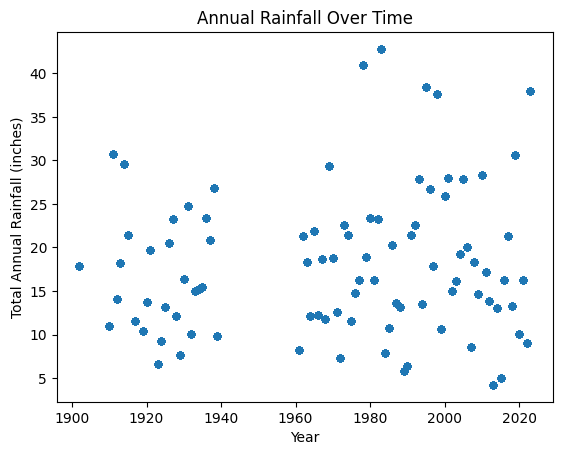

In [53]:
#Visualize annual precipitation over time
#Use a scatter plot rather than aa line graph to avoid misleading lines for yeats when data is missing
df_sorted = merged_df.sort_values(by='CountYear')
rain_plot = df_sorted.plot(x='CountYear', y='total_rain', kind='scatter')
rain_plot.set_xlabel('Year')
rain_plot.set_ylabel('Total Annual Rainfall (inches)')
rain_plot.set_title('Annual Rainfall Over Time')

The plot shows that there isn't a clear overall increase or decrease in rainfall over time, but that the variance in annual rainfall has increased over time.

In [48]:
aggregated_by_year = merged_df.groupby("CountYear").agg(
    total_count=('how_manyCW', 'sum'),
    total_by_party_hours=('NumberByPartyHours', 'sum'), 
    total_rain=('total_rain', 'mean')
)
aggregated_by_year = aggregated_by_year.reset_index()
aggregated_by_year.head()

,CountYear,total_count,total_by_party_hours,total_rain
0,1902,399,0.0,17.85
1,1910,4247,0.0,10.93
2,1911,6704,0.0,30.74
3,1912,9166,0.0,14.06
4,1913,7831,0.0,18.25


In [49]:
aggregated_by_year[aggregated_by_year['total_by_party_hours'] != 0]

,CountYear,total_count,total_by_party_hours,total_rain
28,1961,14035,483.9654,8.180000
29,1962,27446,280.0607,21.350000
30,1963,38251,273.2201,18.350000
31,1964,45129,334.2882,12.190000
32,1965,40067,325.7473,21.890000
...,...,...,...,...
86,2019,30538,95.5797,30.600000
87,2020,29631,82.7460,10.120000
88,2021,31639,98.5634,16.220000
89,2022,21022,85.8587,9.050000


Text(0.5, 1.0, 'Birds Counted By Party Hours Over Time')

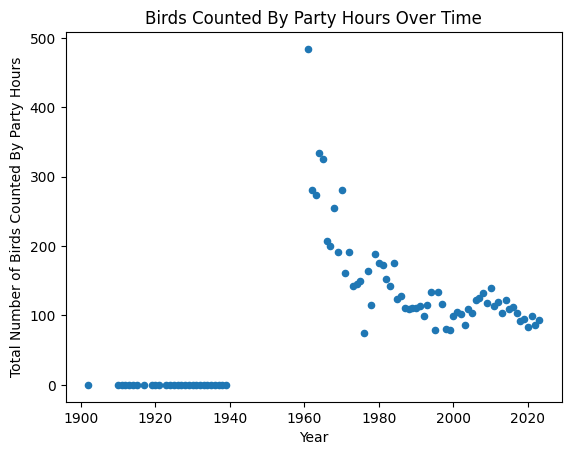

In [50]:
#Visualize the total birds counted by party hours over time.
#Using the birds per party hour feature helps control for the differing 
#number of party hours each year which affects how many birds are counted. 
#However, it also means that there aren't any non-zero values until 1961, 
#significantly shrinking the time period over which we can detect trends.
count_plot = aggregated_by_year.plot(x='CountYear', y='total_by_party_hours', kind='scatter')
count_plot.set_xlabel('Year')
count_plot.set_ylabel('Total Number of Birds Counted By Party Hours')
count_plot.set_title('Birds Counted By Party Hours Over Time')

This shows that there was a significant decline in the number of birds counted per party hour in the 60s and 70s. From 1980 onwards there was an overall decline, but with periods of increases. It is unclear why there were no birds counted by party hours before 1961.

Text(0.5, 1.0, 'Birds Counted Over Time')

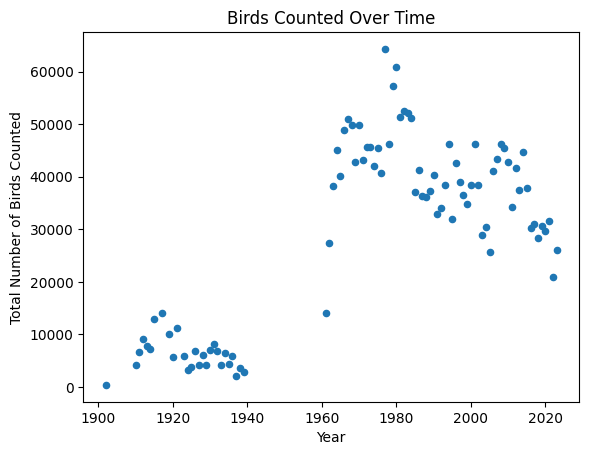

In [52]:
#Check for any interesting trends in the total number of birds counted over 
#time. This also allows us to look at bird count data from the years before 1961.
count_plot = aggregated_by_year.plot(x='CountYear', y='total_count', kind='scatter')
count_plot.set_xlabel('Year')
count_plot.set_ylabel('Total Number of Birds Counted')
count_plot.set_title('Birds Counted Over Time')

Text(0.5, 1.0, 'Birds Counted By Party Hours vs Annual Rainfall')

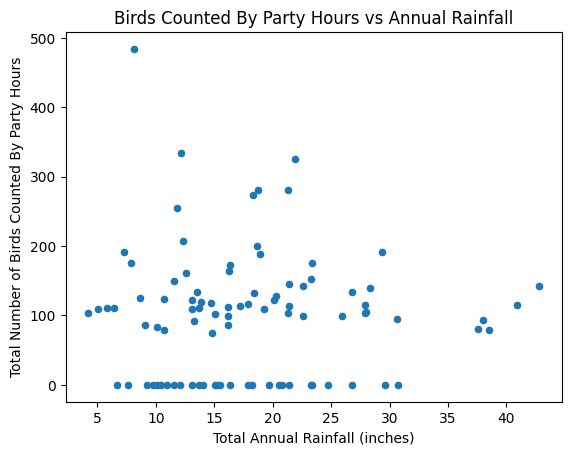

In [51]:
#Plot the total number of birds countned by party hour vs the rainfall
count_vs_rain = aggregated_by_year.plot(x='total_rain', y='total_by_party_hours', kind='scatter')
count_vs_rain.set_xlabel('Total Annual Rainfall (inches)')
count_vs_rain.set_ylabel('Total Number of Birds Counted By Party Hours')
count_vs_rain.set_title('Birds Counted By Party Hours vs Annual Rainfall')

This shows that there isn't a noticeable correlation between total annual rainfall and the number of birds counted by party hours.

Text(0.5, 1.0, 'Birds Counted vs Annual Rainfall')

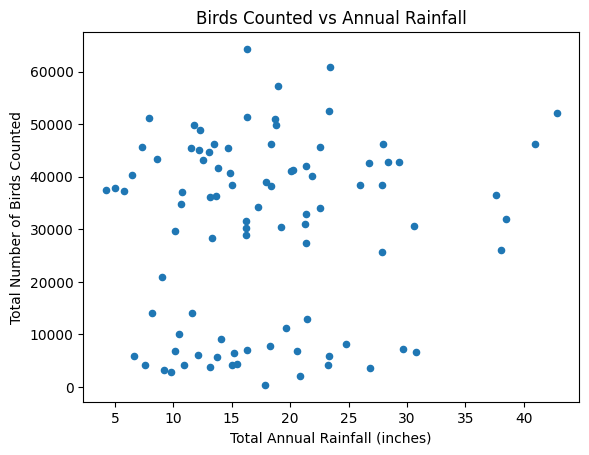

In [53]:
#Check for a correlation between the number of birds counted and the annual rainfall
raw_count_vs_rain = aggregated_by_year.plot(x='total_rain', y='total_count', kind='scatter')
raw_count_vs_rain.set_xlabel('Total Annual Rainfall (inches)')
raw_count_vs_rain.set_ylabel('Total Number of Birds Counted')
raw_count_vs_rain.set_title('Birds Counted vs Annual Rainfall')

This shows that there isn't a noticeable correlation between total annual rainfall and the number of birds counted.

*Answer to research question:* There is not a strong correlation between total annual rainfall and the number of birds counted or the number of birds counted by party hour. This suggests that the total annual rainfall does not signifiantly impact bird population sizes.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time I would rename the columns of the data frames to follow a standard format. I would also further explore the data by checking for correlations between individual species and total annual rainfall as well as looking for trends for individual species that do not math the overall trends. I would also explore correlations between bird populations and other factors that may influence them, such as average temperature, temperature extremes, and use of DDT in Santa Barbara.